# MNIST dataset

We'll split MNIST dataset (test) and locate under the directory with label number.

file name -> `/<label#>/<offset#>`

Pytorch stores MNIST dataset under `./data/MNIST/raw/`

In [35]:
#|export
import os
import torchvision

In [30]:
#|export
torchvision.datasets.MNIST(root='./data', train=False, download=True)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

In [31]:
#|export
base_path = './data/MNIST/raw/'
os.listdir(base_path)

['t10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 't10k-images-idx3-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz',
 'train-labels-idx1-ubyte',
 't10k-labels-idx1-ubyte.gz']

In [32]:
#|export
path = os.path.join(base_path, 't10k-labels-idx1-ubyte')
print(os.stat(path).st_size)
with open(path, 'rb') as f:
    labels = list(f.read())

len(labels), labels[:12]

10008


(10008, [0, 0, 8, 1, 0, 0, 39, 16, 7, 2, 1, 0])

In [33]:
#|export
path = os.path.join('./data/MNIST', 'sorted')
os.makedirs(path, exist_ok=True)
for i in range(10):
    p = os.path.join(path, str(i))
    os.makedirs(p, exist_ok=True)
sorted(os.listdir(path))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [34]:
#|export
labels = labels[8:]
labels = [(i, l) for i, l in enumerate(labels)]
labels[:9]

[(0, 7), (1, 2), (2, 1), (3, 0), (4, 4), (5, 1), (6, 4), (7, 9), (8, 5)]

In [36]:
import numpy
import matplotlib.pyplot as plt
def show_image(x):
    x = numpy.array(list(x)).reshape(28,28)
    plt.imshow(x)

In [37]:
#|export
with open('./data/MNIST/raw/t10k-images-idx3-ubyte', 'rb') as f1:
    for i, l in labels:
        path = os.path.join('./data/MNIST/sorted', str(l), str(i))
        with open(path, 'wb') as f2:
            f1.seek(16+28*28*i, 0)
            x = f1.read(28*28)
            #show_image(x)
            f2.write(x)
            #break

Each image file is stored as below:
`./data/MNIST/sorted/<label#>/<offset#>`

You can take a label information from the path

In [26]:
#!find ./data/MNIST/sorted
! ls -al ./data/MNIST/sorted/7 | head

total 8224
drwxr-xr-x  1030 harukadoyu  staff  32960 Feb 19 09:40 .
drwxr-xr-x    12 harukadoyu  staff    384 Feb 19 09:40 ..
-rw-r--r--     1 harukadoyu  staff    784 Feb 19 14:28 0
-rw-r--r--     1 harukadoyu  staff    784 Feb 19 14:28 1006
-rw-r--r--     1 harukadoyu  staff    784 Feb 19 14:28 1012
-rw-r--r--     1 harukadoyu  staff    784 Feb 19 14:28 1021
-rw-r--r--     1 harukadoyu  staff    784 Feb 19 14:28 1039
-rw-r--r--     1 harukadoyu  staff    784 Feb 19 14:28 1055
-rw-r--r--     1 harukadoyu  staff    784 Feb 19 14:28 1071
ls: stdout: Undefined error: 0


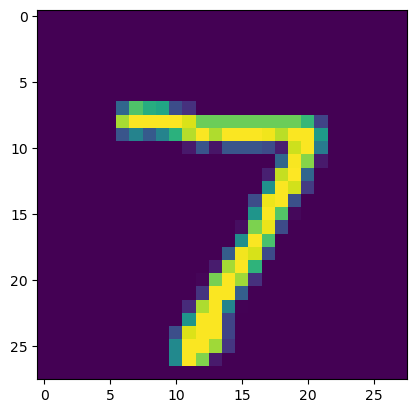

In [27]:
path = "data/MNIST/sorted/7/0"
with open(path, 'rb') as f:
    x = list(f.read())
    show_image(x)

In [28]:
path = "data/MNIST/sorted/2/1"
with open(path, 'rb') as f:
    x = list(f.read())
    show_image(x)

# Run (Example)

In [ ]:
!file run

In [ ]:
# Shows each score from 0-9 in %.3f format
!./run data/MNIST/sorted/7/0

In [ ]:
# Takes multiple files
!./run data/MNIST/sorted/7/0 data/MNIST/sorted/2/1 data/MNIST/sorted/1/2